In [1]:
#Importing Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\webmd_drug_side_effects_data.csv")
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


Drug (categorical): name of drug
DrugId (numerical): drug id
Condition (categorical): name of condition
Review (text): patient review
Side (text): side effects associated with drug (if any)
EaseOfUse (numerical): 5 star rating
Effectiveness (numerical): 5 star rating
Satisfaction (numerical): 5 star rating
Date (date): date of review entry
UsefulCount (numerical): number of users who found review useful.
Age (numerical): age group range of user
Sex (categorical): gender of user

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [4]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 362806 observations and 12 features in this dataset. 



# Data preprocessing

In [6]:
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [7]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [8]:
df.apply(lambda x: len(x.unique()))

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250160
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [9]:
df['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [10]:
print("There are {} types of Drugs in this dataset such as {}... \n".format(len(df.Drug.unique()),
                                                                           ", ".join(df.Drug.unique()[0:5])))

There are 7093 types of Drugs in this dataset such as 25dph-7.5peh, warfarin (bulk) 100 % powder, wymzya fe, 12 hour nasal relief spray, non-aerosol, pyrogallol crystals... 



In [11]:
df['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [12]:
print("There are {} types of Sides in this dataset such as {}... \n".format(len(df.Sides.unique()),
                                                                           ", ".join(df.Sides.unique()[0:5])))

There are 1651 types of Sides in this dataset such as Drowsiness,  dizziness ,  dry mouth /nose/throat,  headache ,  upset stomach ,  constipation , or  trouble sleeping  may occur.,  , Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur., Temporary burning, stinging, dryness in the nose,  runny nose , and  sneezing  may occur., Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, or  weight  gain may occur.... 



In [13]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [14]:
df['Sex'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Female    65.7%
Male      27.0%
           7.3%
Name: Sex, dtype: object

<span style="color:blue"> The 'Sex' column have values (26537) which have not been categorized. Since the number of rows having blank cells in Sex Column is only 7.3%, it is dropped</span> 

In [15]:
df['Sex'].replace(' ', np.nan, inplace = True)

In [16]:
df['Sex'].isnull().sum()

26537

In [17]:
df.dropna(subset=['Sex'],inplace=True)

In [18]:
df['Sex'].value_counts()

Female    238226
Male       98043
Name: Sex, dtype: int64

In [19]:
df['UsefulCount'].value_counts()

0      64065
1      42659
2      32167
3      25564
4      21443
       ...  
255        1
169        1
176        1
154        1
95         1
Name: UsefulCount, Length: 147, dtype: int64

In [20]:
# check for categorical attributes

cat_col = []
for x in df:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [21]:
df.Drug.mode()
#cymbalta is the most occuring drug

0    cymbalta
Name: Drug, dtype: object

In [22]:
df['Drug'].value_counts()

cymbalta                                           4451
lisinopril                                         4022
lisinopril solution                                4022
lexapro                                            3912
hydrocodone-acetaminophen                          3661
                                                   ... 
stay awake tablet                                     1
huperzine serrate a (bulk) 1 % powder                 1
stearic acid powder                                   1
nitrofurantoin macrocrystal (bulk) 100 % powder       1
isoflurane liquid                                     1
Name: Drug, Length: 6846, dtype: int64

In [23]:
df['Effectiveness'].value_counts()

5    120887
4     76460
3     56114
1     54330
2     28476
6         2
Name: Effectiveness, dtype: int64

<span style="color:blue">"Effectiveness" column contains rating value from 1 to 5,Therefore value that indicates rating of 6  has no relevance and has to be
removed to get a clean Data Set</span>

In [24]:
effectiveness_6 = df[ df['Effectiveness'] == 6 ].index

In [25]:
df.drop(effectiveness_6, inplace = True)

In [26]:
df.Effectiveness.value_counts()

5    120887
4     76460
3     56114
1     54330
2     28476
Name: Effectiveness, dtype: int64

# Finding Missing Values

In [27]:
df['Age'].value_counts()


45-54         75996
55-64         70127
35-44         52733
25-34         47958
65-74         37922
19-24         23163
75 or over    14118
13-18          6687
               4692
07-Dec         1596
03-Jun          808
0-2             467
Name: Age, dtype: int64

<span style="color:blue">_Here we can observe that the column "Age" has empty values/empty string (4692).These are to be droped after filling it with null values.The names of age groups '03-Jun' & '03-Dec' have to be changed to '3-6'& '7-12'respectively._</span>

In [28]:
df['Age'].replace(' ', np.nan, inplace=True)

In [29]:
df.dropna(subset=['Age'], inplace=True)

In [30]:
df['Age'].replace(to_replace = ['03-Jun'], value = '3-6', inplace = True)

In [31]:
df['Age'].replace(to_replace = ['07-Dec'], value = '7-12', inplace = True)

In [32]:
df['Age'].value_counts()

45-54         75996
55-64         70127
35-44         52733
25-34         47958
65-74         37922
19-24         23163
75 or over    14118
13-18          6687
7-12           1596
3-6             808
0-2             467
Name: Age, dtype: int64

In [33]:
df["Sex"].value_counts()

Female    234816
Male       96759
Name: Sex, dtype: int64

# DATA VISUALISATION AND EXPLORATORY DATA ANALYSIS

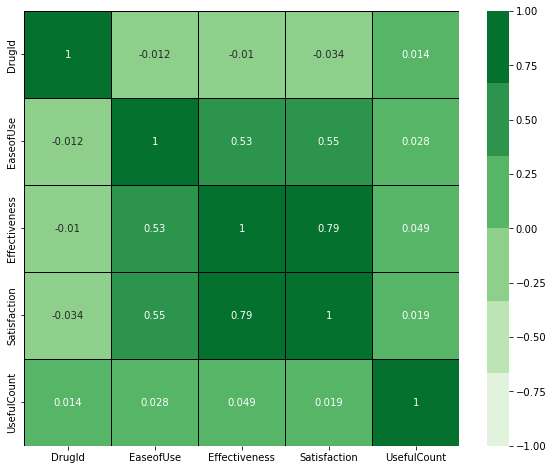

In [34]:
#CHECKING CORRELATION
fig=plt.gcf()
fig.set_size_inches(10,8)
colormap=sns.color_palette('Greens')
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True,cmap=colormap)

<span style="color:blue">The features Effectiveness and Satisfaction have high correlation</span>

### Visual Representation of text data in respect of feature 'Drug'

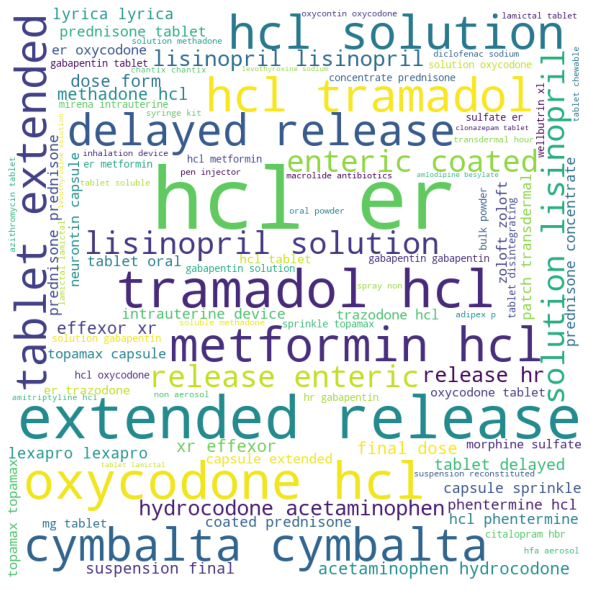

In [35]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Drug:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

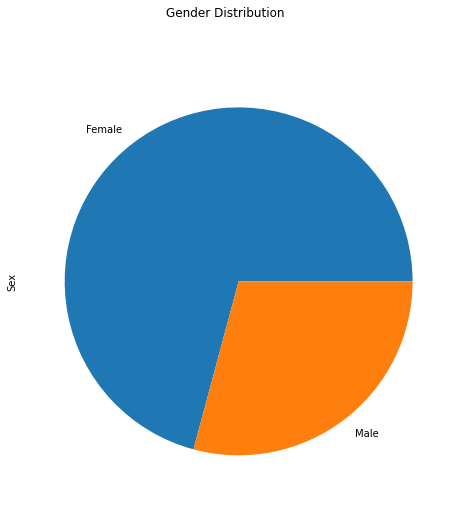

In [36]:
df1=df['Sex'].tolist()
male=df1.count('Male',)
female=df1.count('Female')
ax=df.Sex.value_counts().plot.pie(subplots=True,figsize=(15,8),title='Gender Distribution')

### Catplot of Satisfaction with respect to Sex column is given below.¶

<Figure size 720x1080 with 0 Axes>

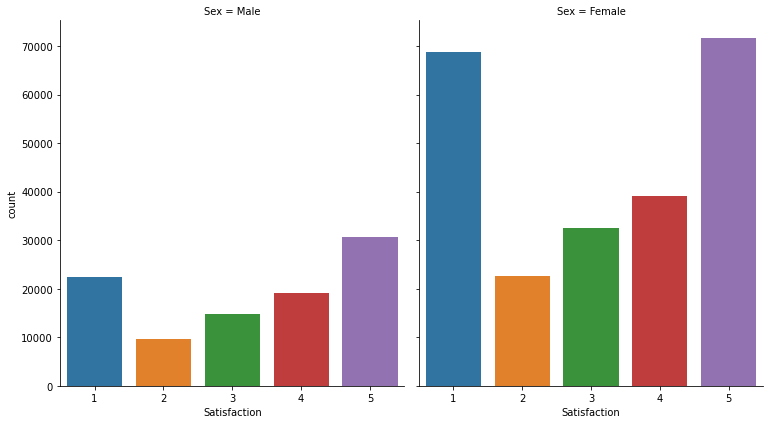

In [37]:
plt.figure(figsize=(10,15))
g = sns.catplot(x="Satisfaction",col="Sex",
                data=df, kind="count",
                height=6,aspect =.9);

<span style="color:blue">The pattern of Satisfaction rating are similar in respect of both sex</span>

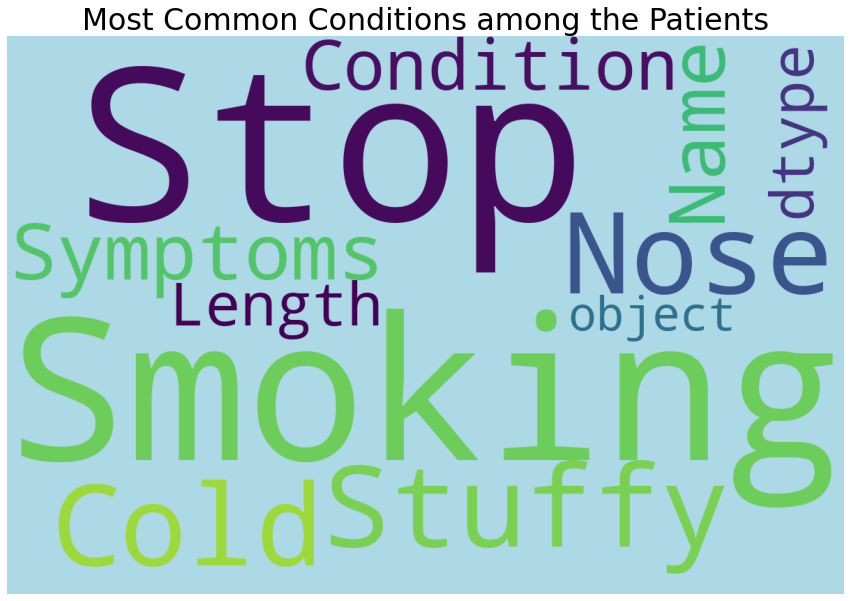

In [38]:
# most common condition

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(df['Condition']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 30)
print(wordcloud)
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

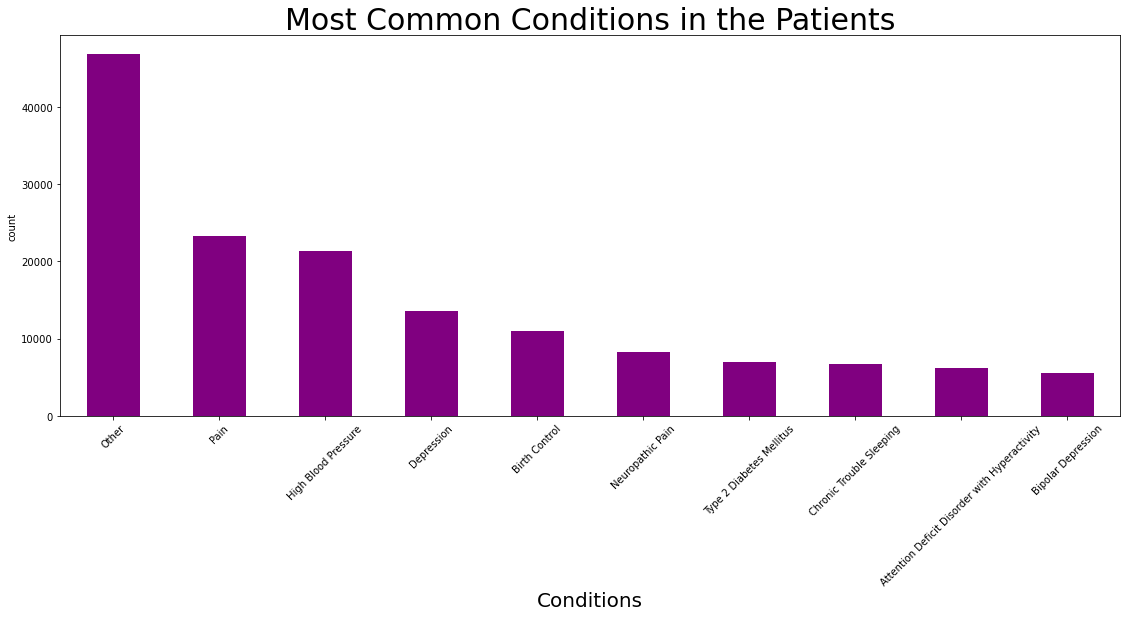

In [39]:
# checking the different types of conditions patients

df['Condition'].value_counts().head(10).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.xticks(rotation=45);
plt.show()

<span style="color:blue">***Most common conditions reported among patients are Pain, High Blood Pressure, Depression, Neuropathic pain, Neuropathic Pain*** etc</span> 

### Feature engineering 

In [40]:
# let's make a new column review sentiment 

df.loc[(df['Satisfaction'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['Satisfaction'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

0.0    229281
1.0    102294
Name: Review_Sentiment, dtype: int64

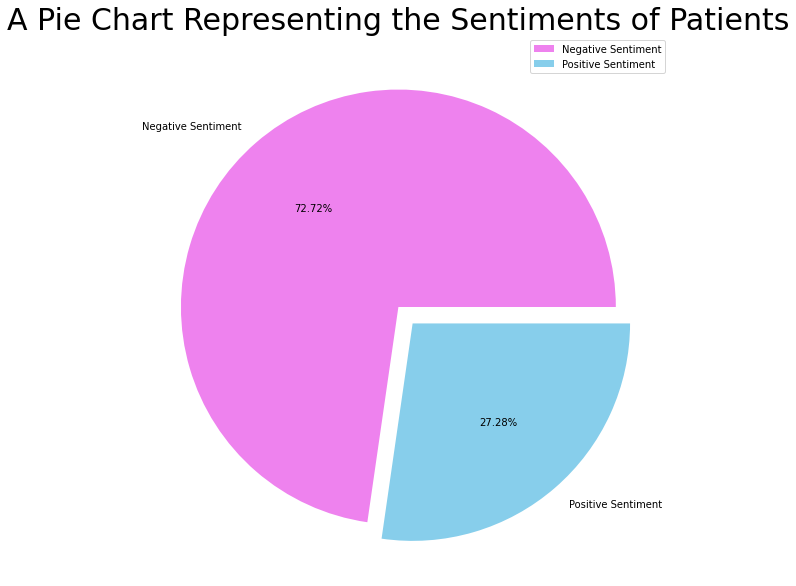

In [41]:
# a pie chart to represent the sentiments of the patients

size = [ 3380, 1268]
colors = ['violet', 'skyblue']
labels = "Negative Sentiment","Positive Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

<span style="color:blue">Majority of patients have given the satisfaction rating below 5 and thereby expressed their negative sentiment</span>

In [42]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment
0,75 or over,Stuffy Nose,09/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,1.0
1,25-34,Cold Symptoms,01/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,1.0
2,65-74,Other,07/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,0.0
3,75 or over,Other,09/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,0.0
4,35-44,Other,01/06/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362799,25-34,Stop Smoking,11/16/2008,chantix,144470,2,4,I have tried the patch and quitting cold turke...,4,Female,"Nausea , headache , vomiting , drowsiness, g...",5,0.0
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,1.0
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,0.0
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,1.0


In [43]:
# converting the date into datetime format
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

# now extracting year from date
df['Year'] = df['Date'].dt.year

# extracting the month from the date
df['month'] = df['Date'].dt.month

# extracting the days from the date
df['day'] = df['Date'].dt.day

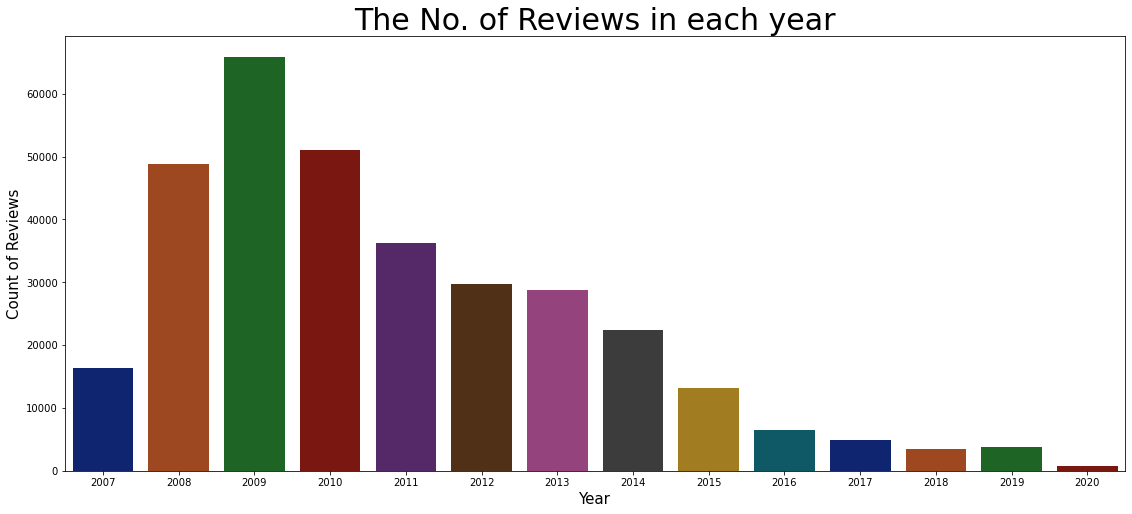

In [44]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(df['Year'], palette ='dark')
plt.title('The No. of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

# Visual Representation of Effectiveness Rating

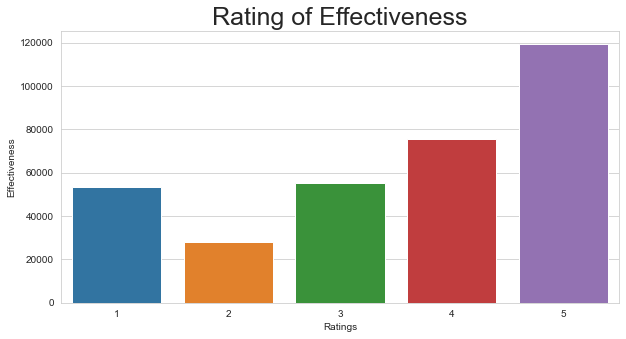

In [45]:
effectivenessRating = df['Effectiveness'].value_counts().reset_index()
effectivenessRating.columns = ["Ratings", "Effectiveness"]
effectivenessRating
# set style
sns.set_style("whitegrid");
plt.figure(figsize=(10,5));
sns.barplot(x = 'Ratings',y = 'Effectiveness', data = effectivenessRating);
plt.title('Rating of Effectiveness', fontsize = 25)
plt.show();

# Visual Representation of EaseofUse Rating¶

Text(0.5, 1.0, 'Rating of Ease of Use')

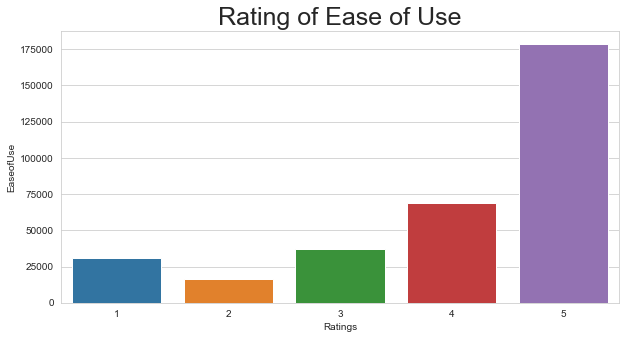

In [46]:
easeOfUseRating = df['EaseofUse'].value_counts().reset_index()
easeOfUseRating.columns = ["Ratings", "EaseofUse"]

easeOfUseRating
# set style
sns.set_style("whitegrid");
plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y = "EaseofUse", data = easeOfUseRating);
plt.title('Rating of Ease of Use', fontsize = 25)

# Visual Representation of Age distribution 

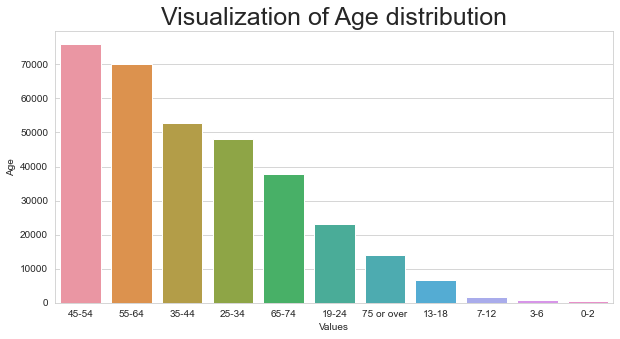

In [47]:
ageColourful = df['Age'].value_counts().reset_index()
ageColourful.columns = ["Values", "Age"]
ageColourful
# set style
sns.set_style("whitegrid");
plt.figure(figsize = (10,5));
sns.barplot(x = 'Values',y ='Age', data = ageColourful);
plt.title('Visualization of Age distribution', fontsize = 25)
plt.show()

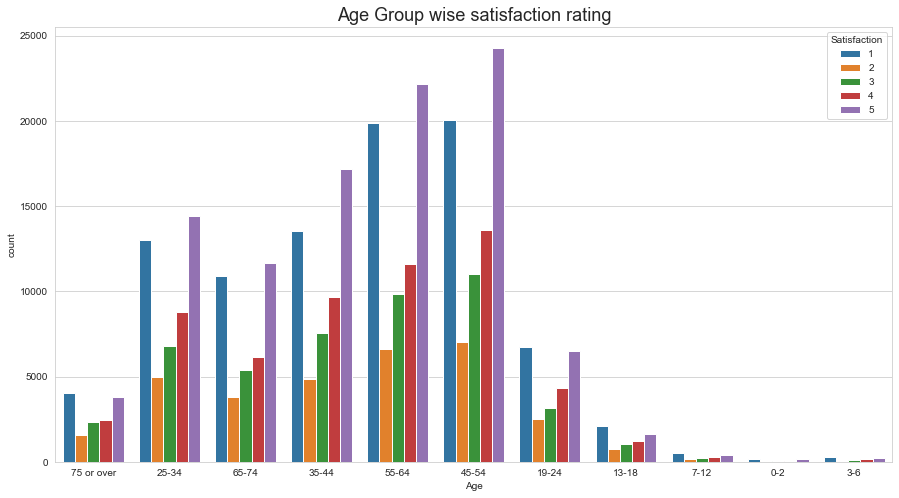

In [48]:
age_effect=df.groupby('Age')['Satisfaction'].sum()
plt.figure(figsize=(15,8))
plt.title('Age Group wise satisfaction rating',fontsize=18)

sns.countplot(data=df,x="Age",hue="Satisfaction")
plt.show()

# Data Preprocessing Part II

In [49]:
df.Reviews.nunique()

229413

In [50]:
#Since Reviews is having more than half of the values as unique, let us drop this column.
df.drop('Reviews',axis=1,inplace=True)

In [51]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment,Year,month,day
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,1.0,2014,9,21
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,1.0,2011,1,13
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,3,Female,,0,0.0,2012,7,16
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,1,Female,,0,0.0,2010,9,23
4,35-44,Other,2009-01-06,warfarin (bulk) 100 % powder,144731,1,1,1,Male,,1,0.0,2009,1,6


In [52]:
df.Drug.mode()

0    cymbalta
Name: Drug, dtype: object

# <span style="color:green">*****Selection of Drug:We are selecting the dataset extracted based on the drug named 'cymbalta' with DrugId =91491.Because it is having the most occurences.*****</span>

In [53]:
df=df.drop(df.loc[(df['Drug']!='cymbalta')].index)

In [54]:
df.shape

(4400, 15)

In [55]:
df_copy =df

In [56]:
# CHECK OUTLIERS 

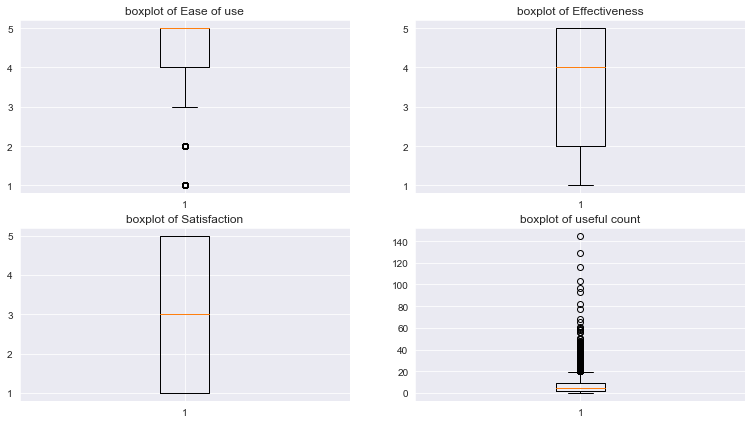

In [57]:
plt.figure(figsize=(13,7))
sns.set_style('darkgrid')

plt.subplot(2,2,1)
plt.boxplot(df["EaseofUse"])
plt.title("boxplot of Ease of use")

plt.subplot(2,2,2)
plt.boxplot(df["Effectiveness"])
plt.title("boxplot of Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(df["Satisfaction"])
plt.title("boxplot of Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(df["UsefulCount"])
plt.title("boxplot of useful count")
plt.show()


In [58]:
Q1=np.percentile(df["UsefulCount"],25,interpolation="midpoint")
Q3=np.percentile(df["UsefulCount"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)

lower limit= -8.5
upperlimit =  19.5


In [59]:
outlier = []
for x in df['UsefulCount']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier


[22,
 30,
 28,
 21,
 25,
 56,
 29,
 23,
 29,
 21,
 32,
 24,
 22,
 21,
 25,
 25,
 32,
 22,
 30,
 20,
 42,
 30,
 22,
 103,
 38,
 28,
 30,
 26,
 61,
 25,
 26,
 28,
 145,
 27,
 29,
 43,
 39,
 30,
 22,
 21,
 35,
 33,
 48,
 36,
 56,
 27,
 38,
 21,
 24,
 30,
 22,
 22,
 31,
 21,
 21,
 25,
 93,
 24,
 31,
 35,
 82,
 20,
 33,
 25,
 58,
 20,
 46,
 47,
 45,
 34,
 60,
 48,
 26,
 29,
 50,
 36,
 20,
 25,
 47,
 20,
 20,
 23,
 41,
 26,
 21,
 22,
 25,
 21,
 23,
 22,
 28,
 22,
 21,
 28,
 20,
 42,
 27,
 20,
 28,
 22,
 26,
 25,
 29,
 23,
 26,
 116,
 21,
 51,
 40,
 29,
 20,
 28,
 28,
 25,
 21,
 34,
 31,
 30,
 23,
 20,
 20,
 26,
 35,
 29,
 65,
 24,
 22,
 30,
 20,
 26,
 34,
 20,
 21,
 46,
 23,
 20,
 23,
 27,
 27,
 35,
 25,
 20,
 21,
 21,
 28,
 97,
 23,
 23,
 22,
 33,
 56,
 45,
 39,
 21,
 23,
 41,
 77,
 31,
 129,
 24,
 22,
 20,
 31,
 24,
 34,
 22,
 20,
 21,
 23,
 24,
 21,
 22,
 22,
 29,
 22,
 22,
 23,
 20,
 22,
 22,
 28,
 24,
 20,
 20,
 22,
 24,
 20,
 21,
 22,
 32,
 21,
 20,
 21,
 27,
 46,
 31,
 29,
 44,
 46,
 

In [60]:
df=df.drop(df.loc[df["UsefulCount"]>upper].index)

In [61]:
df=df.drop(df.loc[df["UsefulCount"]<low].index)

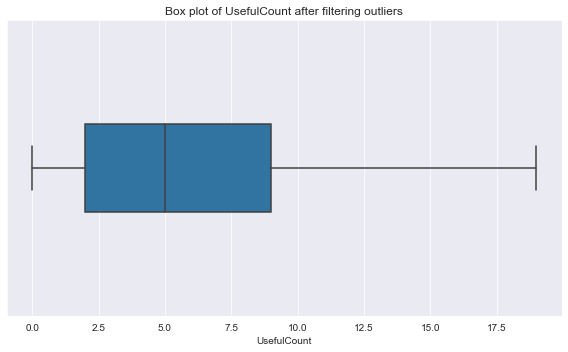

In [62]:
f=plt.figure(figsize=(8,5))
sns.boxplot(df['UsefulCount'],data=df,width=0.3, orient="v")
plt.title('Box plot of UsefulCount after filtering outliers');
f.tight_layout()

In [63]:
Q1=np.percentile(df["EaseofUse"],25,interpolation="midpoint")
Q3=np.percentile(df["EaseofUse"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)


lower limit= 2.5
upperlimit =  6.5


In [64]:
outlier = []
for x in df['EaseofUse']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier


[2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,


In [65]:
df=df.drop(df.loc[df["EaseofUse"]<low].index)

In [66]:
df=df.drop(df.loc[df["EaseofUse"]>upper].index)

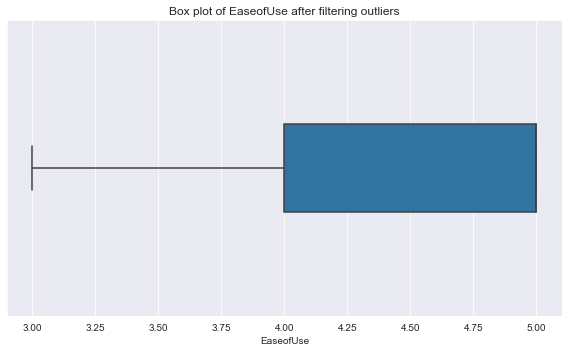

In [67]:
f=plt.figure(figsize=(8,5))
sns.boxplot(df['EaseofUse'],data=df,width=0.3, orient="v")
plt.title('Box plot of EaseofUse after filtering outliers')
f.tight_layout();

In [68]:
df.shape

(3585, 15)

In [69]:
df_copy.shape

(4400, 15)

In [70]:
#adding index column
list2=list(range(3585))
df=df.set_index([list2])

list3 = list(range(4400))
df_copy=df_copy.set_index([list3])


In [71]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment,Year,month,day
0,45-54,Repeated Episodes of Anxiety,2020-01-13,cymbalta,91491,3,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2020,1,13
1,35-44,Anxiousness associated with Depression,2019-12-06,cymbalta,91491,3,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,12,6
2,45-54,Chronic Muscle or Bone Pain,2019-11-09,cymbalta,91491,5,4,4,Female,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,11,9
3,55-64,Chronic Muscle or Bone Pain,2019-09-18,cymbalta,91491,5,4,4,Male,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,9,18
4,75 or over,Chronic Muscle or Bone Pain,2019-08-13,cymbalta,91491,5,5,5,Female,"Nausea , dry mouth , constipation , loss of ...",1,1.0,2019,8,13


In [72]:
df_copy.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment,Year,month,day
0,45-54,Repeated Episodes of Anxiety,2020-01-13,cymbalta,91491,3,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2020,1,13
1,35-44,Anxiousness associated with Depression,2019-12-06,cymbalta,91491,3,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,12,6
2,45-54,Chronic Muscle or Bone Pain,2019-11-09,cymbalta,91491,5,4,4,Female,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,11,9
3,19-24,Major Depressive Disorder,2019-09-29,cymbalta,91491,2,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",2,0.0,2019,9,29
4,55-64,Chronic Muscle or Bone Pain,2019-09-18,cymbalta,91491,5,4,4,Male,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,9,18


#### Most common conditions reported among patients are Pan, High Blood Pressure, Depression, Neuropathic pain, Neuropathic Pain etc

# Data visualization Part II (Based on the drug cymbalta)

*****Pie chart showing percentage wise different conditions of the patients*****

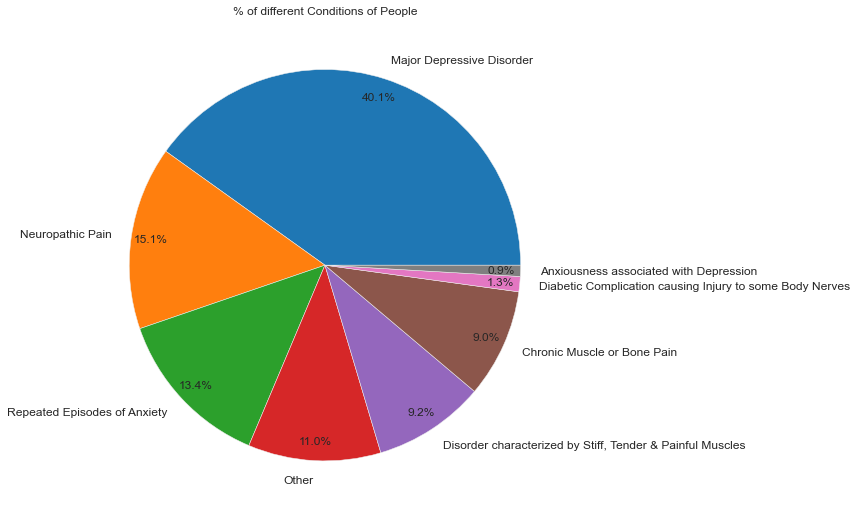

In [73]:
plt.figure(figsize=(15,9))
plt.title('% of different Conditions of People')
tr = pd.DataFrame(df['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)

plt.show()

*****Count plot of various Age groups and their sex is displayed below.*****

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

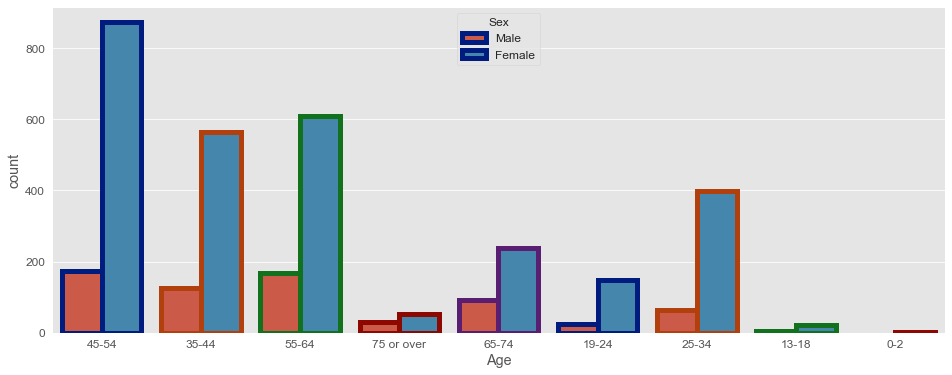

In [74]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Age",hue = "Sex" ,edgecolor=sns.color_palette("dark", 5),data=df,
                   linewidth=5,)
plt


## Effect of drug on age group 45-54 (which is mostly affected among the group)

In [75]:
dt=df.loc[(df['Age']=="45-54")]

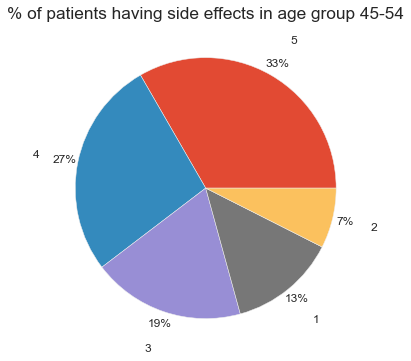

In [76]:
tr = pd.DataFrame(dt['Effectiveness'].value_counts())
tr_names = tr.index
count=tr['Effectiveness']

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.rc('font', size=12)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.3)
plt.title('% of patients having side effects in age group 45-54')
plt.show()


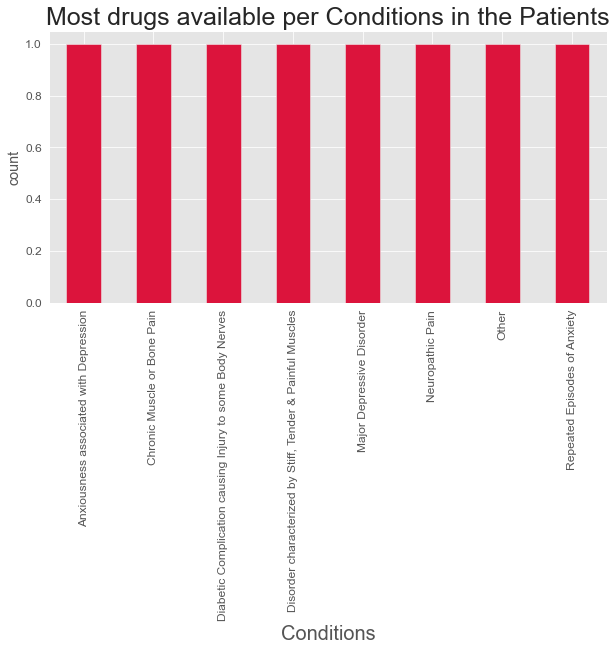

In [77]:
# checking the most popular drugs per conditions

df.groupby(['Condition'])['Drug'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (10, 5), color = 'crimson')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 25)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

In [78]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment,Year,month,day
0,45-54,Repeated Episodes of Anxiety,01/13/2020,cymbalta,91491,3,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2020,1,13
1,35-44,Anxiousness associated with Depression,12/06/2019,cymbalta,91491,3,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,12,6
2,45-54,Chronic Muscle or Bone Pain,11/09/2019,cymbalta,91491,5,4,4,Female,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,11,9
3,55-64,Chronic Muscle or Bone Pain,09/18/2019,cymbalta,91491,5,4,4,Male,"Nausea , dry mouth , constipation , loss of ...",0,0.0,2019,9,18
4,75 or over,Chronic Muscle or Bone Pain,08/13/2019,cymbalta,91491,5,5,5,Female,"Nausea , dry mouth , constipation , loss of ...",1,1.0,2019,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,35-44,Major Depressive Disorder,07/18/2008,cymbalta,91491,5,5,5,Female,"Nausea , dry mouth , constipation , loss of ...",6,1.0,2008,7,18
3581,35-44,Major Depressive Disorder,07/17/2008,cymbalta,91491,5,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",9,0.0,2008,7,17
3582,25-34,Neuropathic Pain,07/17/2008,cymbalta,91491,4,4,4,Female,"Nausea , dry mouth , constipation , loss of ...",2,0.0,2008,7,17
3583,55-64,Major Depressive Disorder,07/17/2008,cymbalta,91491,4,4,3,Female,"Nausea , dry mouth , constipation , loss of ...",6,0.0,2008,7,17


In [79]:
# converting the date into datetime format
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

# now extracting year from date
df['Year'] = df['Date'].dt.year

# extracting the month from the date
df['month'] = df['Date'].dt.month

# extracting the days from the date
df['day'] = df['Date'].dt.day

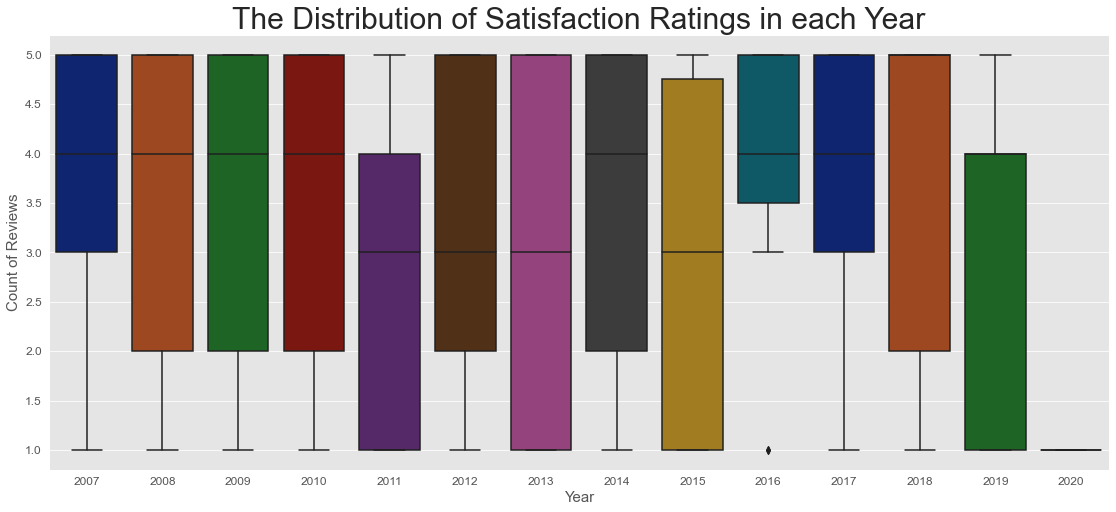

In [80]:
# looking at the distribution of satisfaction ratings in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.boxplot(x = df['Year'], y = df['Satisfaction'], palette ='dark')
plt.title('The Distribution of Satisfaction Ratings in each Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

# Visual Representation of Effectiveness Rating

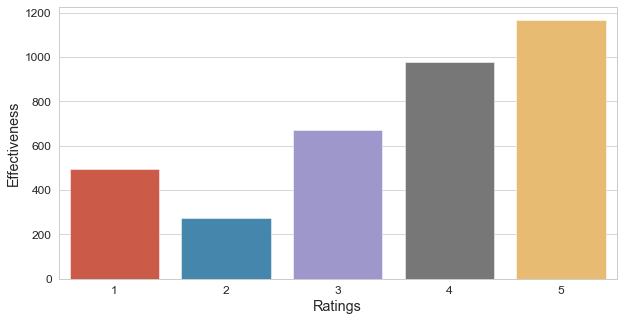

In [81]:
effectivenessRating = df['Effectiveness'].value_counts().reset_index()
effectivenessRating.columns = ["Ratings", "Effectiveness"]
effectivenessRating
# set style
sns.set_style("whitegrid");
plt.figure(figsize=(10,5));
sns.barplot(x = 'Ratings',y = 'Effectiveness', data = effectivenessRating);
plt.show();

#### With regard to Effectiveness majority of patients have given rating 3 to 5

# Visual Representation of EaseofUse Rating

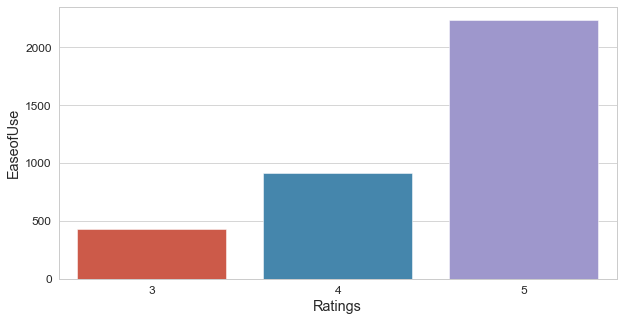

In [82]:
easeOfUseRating = df['EaseofUse'].value_counts().reset_index()
easeOfUseRating.columns = ["Ratings", "EaseofUse"]

easeOfUseRating
# set style
sns.set_style("whitegrid");
plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y = "EaseofUse", data = easeOfUseRating);

#### Most of the patients have given highest rating of 5 in respect of Ease of Use

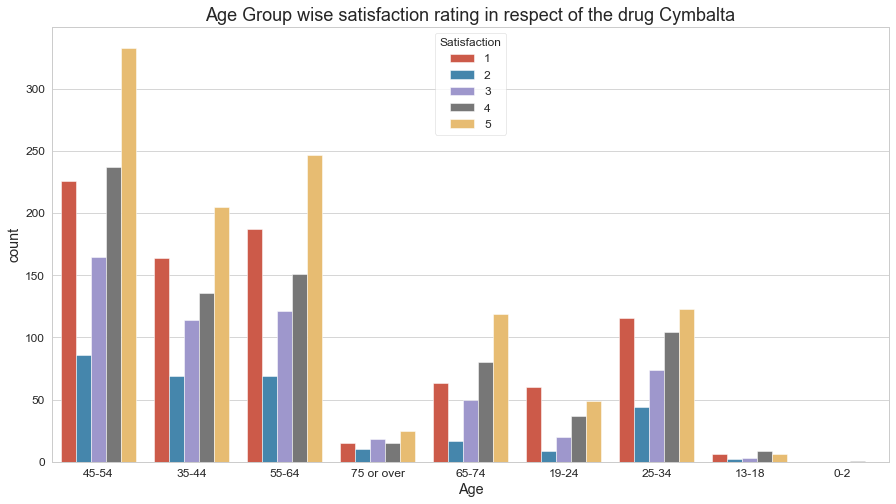

In [83]:
age_effect=df.groupby('Age')['Satisfaction'].sum()
plt.figure(figsize=(15,8))
plt.title('Age Group wise satisfaction rating in respect of the drug Cymbalta',fontsize=18)

sns.countplot(data=df,x="Age",hue="Satisfaction")
plt.show()

<span style="color:blue">The pattern of satisfaction rating given by patients are similar in all age groups above 18. ie . Majority have given a staisfaction rating of 5 in all these age groups</span>

****Scatter plot of relating variables Satisfaction with Sex****

Text(0.5, 1.0, 'Scatter plot of relating variables Satisfaction with Sex')

<Figure size 1080x720 with 0 Axes>

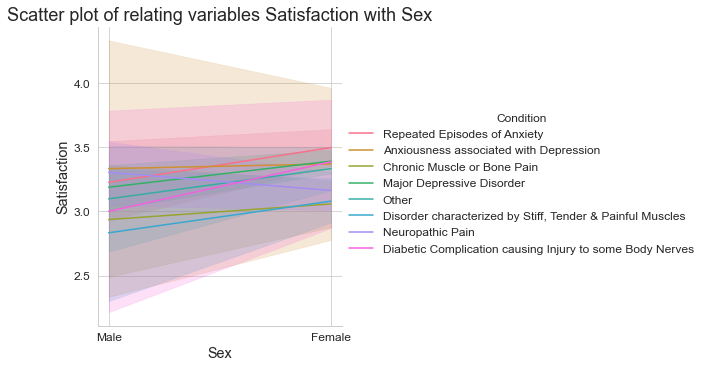

In [84]:
plt.figure(figsize=(15,10))
sns.relplot(y="Satisfaction", x="Sex",hue="Condition" ,kind="line",
            dashes=False, markers=True,data=df);
plt.title('Scatter plot of relating variables Satisfaction with Sex',fontsize=18)

In [85]:
df=df.drop(['Date','day','month','Year','Drug','DrugId','Sides'],axis=1)

In [86]:
df.shape

(3585, 8)

In [87]:
df_copy.shape

(4400, 15)

In [88]:
#now we have got only 4400 rows.

In [89]:
df.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0,0.0
1,35-44,Anxiousness associated with Depression,3,3,2,Female,0,0.0
2,45-54,Chronic Muscle or Bone Pain,5,4,4,Female,0,0.0
3,55-64,Chronic Muscle or Bone Pain,5,4,4,Male,0,0.0
4,75 or over,Chronic Muscle or Bone Pain,5,5,5,Female,1,1.0


In [90]:
df['Satisfaction'].value_counts()

5    1107
1     837
4     770
3     565
2     306
Name: Satisfaction, dtype: int64

In [91]:
df['UsefulCount'].unique()

array([ 0,  1, 12,  3, 15,  4,  5,  2,  7, 18,  9,  8, 19,  6, 17, 13, 14,
       11, 10, 16], dtype=int64)

In [92]:
df.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0,0.0
1,35-44,Anxiousness associated with Depression,3,3,2,Female,0,0.0
2,45-54,Chronic Muscle or Bone Pain,5,4,4,Female,0,0.0
3,55-64,Chronic Muscle or Bone Pain,5,4,4,Male,0,0.0
4,75 or over,Chronic Muscle or Bone Pain,5,5,5,Female,1,1.0


In [93]:
#adding index column
list2=list(range(3585))
df=df.set_index([list2])

list3 = list(range(4400))
df_copy=df_copy.set_index([list3])

In [94]:
df.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0,0.0
1,35-44,Anxiousness associated with Depression,3,3,2,Female,0,0.0
2,45-54,Chronic Muscle or Bone Pain,5,4,4,Female,0,0.0
3,55-64,Chronic Muscle or Bone Pain,5,4,4,Male,0,0.0
4,75 or over,Chronic Muscle or Bone Pain,5,5,5,Female,1,1.0


In [95]:
df_copy=df_copy.drop(['Date','day','month','Year','Drug','DrugId','Sides'],axis=1)

In [96]:
df_copy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0,0.0
1,35-44,Anxiousness associated with Depression,3,3,2,Female,0,0.0
2,45-54,Chronic Muscle or Bone Pain,5,4,4,Female,0,0.0
3,19-24,Major Depressive Disorder,2,1,1,Male,2,0.0
4,55-64,Chronic Muscle or Bone Pain,5,4,4,Male,0,0.0


In [97]:
# On the basis of 'Satisfaction' let us recode the values of 'Effectiveness' to  categorical values rnging from 1 to 5.

In [98]:
df['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)
df['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)
df['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)
df['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)
df['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [99]:
df_copy['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)
df_copy['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)
df_copy['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)
df_copy['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)
df_copy['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [100]:
df.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,Male,0,0.0
1,35-44,Anxiousness associated with Depression,3,moderate side effects,2,Female,0,0.0
2,45-54,Chronic Muscle or Bone Pain,5,mild side effects,4,Female,0,0.0
3,55-64,Chronic Muscle or Bone Pain,5,mild side effects,4,Male,0,0.0
4,75 or over,Chronic Muscle or Bone Pain,5,no side effects,5,Female,1,1.0


In [101]:
df_copy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,Male,0,0.0
1,35-44,Anxiousness associated with Depression,3,moderate side effects,2,Female,0,0.0
2,45-54,Chronic Muscle or Bone Pain,5,mild side effects,4,Female,0,0.0
3,19-24,Major Depressive Disorder,2,extreme severe side effects,1,Male,2,0.0
4,55-64,Chronic Muscle or Bone Pain,5,mild side effects,4,Male,0,0.0


# Label encoding

In [102]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ["Age","Condition","Sex"]:
    df[col]=label.fit_transform(df[col])
    df_copy[col]=label.fit_transform(df_copy[col])
    
datastand=df

In [103]:
df.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,5,7,3,extreme severe side effects,1,1,0,0.0
1,4,0,3,moderate side effects,2,0,0,0.0
2,5,1,5,mild side effects,4,0,0,0.0
3,6,1,5,mild side effects,4,1,0,0.0
4,8,1,5,no side effects,5,0,1,1.0


In [104]:
df_copy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,5,7,3,extreme severe side effects,1,1,0,0.0
1,4,0,3,moderate side effects,2,0,0,0.0
2,5,1,5,mild side effects,4,0,0,0.0
3,2,4,2,extreme severe side effects,1,1,2,0.0
4,6,1,5,mild side effects,4,1,0,0.0


# Data splitting:

In [105]:
y=df['Effectiveness']
x=df.drop(['Effectiveness'],axis=1)
x1=x
x2=x
ycopy=df_copy['Effectiveness']
xcopy=df_copy.drop(['Effectiveness'],axis=1)

In [106]:
x.head(5)

,Age,Condition,EaseofUse,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,5,7,3,1,1,0,0.0
1,4,0,3,2,0,0,0.0
2,5,1,5,4,0,0,0.0
3,6,1,5,4,1,0,0.0
4,8,1,5,5,0,1,1.0


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)
xcopy_train,xcopy_test,ycopy_train,ycopy_test=train_test_split(xcopy,ycopy,random_state=42,test_size=0.1)

# Model Selection

# Logistic Regression¶

In [108]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_lr = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_lr))
print(confusion_matrix(y_test, y_lr))

# Accuracy score
print('accuracy is',accuracy_score(y_test,y_lr))

                             precision    recall  f1-score   support

extreme severe side effects       0.63      1.00      0.77        52
          mild side effects       0.66      0.61      0.64       109
      moderate side effects       0.61      0.54      0.57        65
            no side effects       0.80      0.84      0.82       112
        severe side effects       0.00      0.00      0.00        21

                   accuracy                           0.69       359
                  macro avg       0.54      0.60      0.56       359
               weighted avg       0.65      0.69      0.66       359

[[52  0  0  0  0]
 [ 7 67 11 24  0]
 [ 8 22 35  0  0]
 [ 6 11  1 94  0]
 [10  1 10  0  0]]
accuracy is 0.6908077994428969


# KNeighborsClassifier

In [109]:
# Finding best k value
acc_values=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_knn)
    acc_values.append(acc)

In [110]:
acc_values

[0.6211699164345403,
 0.637883008356546,
 0.6573816155988857,
 0.6518105849582173,
 0.6685236768802229,
 0.6545961002785515,
 0.6434540389972145,
 0.6629526462395543,
 0.6629526462395543,
 0.6629526462395543,
 0.6713091922005571,
 0.6629526462395543]

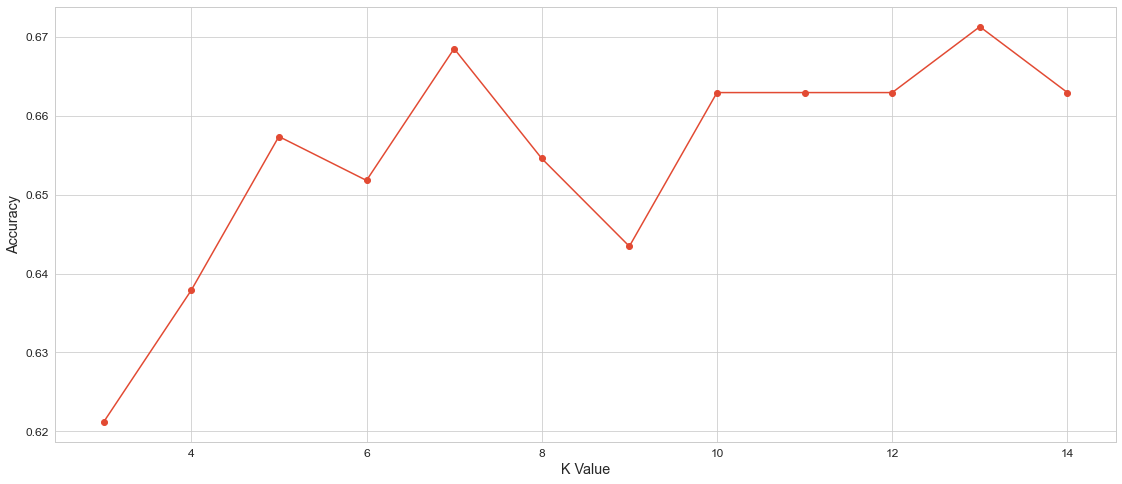

In [111]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy');

In [112]:
knn = KNeighborsClassifier(n_neighbors=9)
from sklearn.metrics import classification_report
knn.fit(x_train, y_train)

y_knn = knn.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_knn))
print(confusion_matrix(y_test, y_knn))

# Accuracy score

print('accuracy is',accuracy_score(y_test,y_knn))

                             precision    recall  f1-score   support

extreme severe side effects       0.56      0.79      0.66        52
          mild side effects       0.65      0.57      0.60       109
      moderate side effects       0.59      0.46      0.52        65
            no side effects       0.74      0.85      0.79       112
        severe side effects       0.27      0.14      0.19        21

                   accuracy                           0.64       359
                  macro avg       0.56      0.56      0.55       359
               weighted avg       0.63      0.64      0.63       359

[[41  0  6  0  5]
 [ 8 62  9 30  0]
 [ 9 20 30  3  3]
 [ 6 10  1 95  0]
 [ 9  4  5  0  3]]
accuracy is 0.6434540389972145


# GradientBoostingClassifier

In [113]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_gb = gb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_gb))
print(confusion_matrix(y_test, y_gb))

# Accuracy score

print('accuracy is',accuracy_score(y_test,y_gb))

                             precision    recall  f1-score   support

extreme severe side effects       0.63      0.92      0.75        52
          mild side effects       0.78      0.61      0.69       109
      moderate side effects       0.63      0.65      0.64        65
            no side effects       0.81      0.84      0.82       112
        severe side effects       0.29      0.19      0.23        21

                   accuracy                           0.71       359
                  macro avg       0.63      0.64      0.63       359
               weighted avg       0.71      0.71      0.70       359

[[48  0  1  0  3]
 [ 7 67 12 22  1]
 [ 8  9 42  0  6]
 [ 4  9  5 94  0]
 [ 9  1  7  0  4]]
accuracy is 0.7103064066852368


**<div class="alert alert-block alert-info">As this classification model seems to give greater accuracy, let us visualize Heat Map of confusion matrix of this model.</div>** 

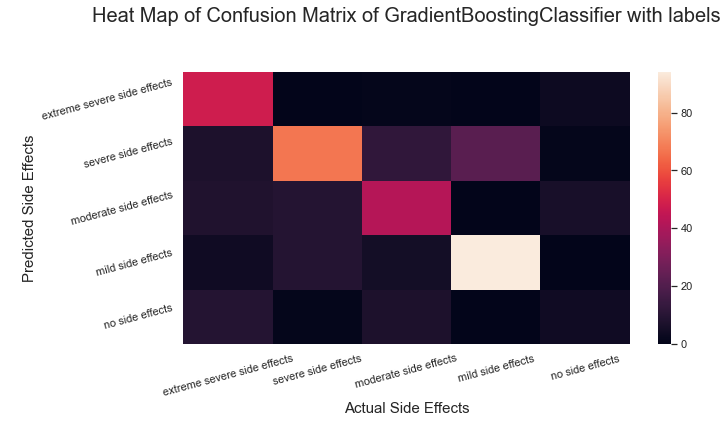

In [114]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_gb)
sns.set(rc = {'figure.figsize':(10,5)})
ax = sns.heatmap(cm)

ax.set_title('Heat Map of Confusion Matrix of GradientBoostingClassifier with labels\n\n', fontsize = 20);
ax.set_xlabel('Actual Side Effects',  fontsize = 15);
ax.set_ylabel('\nPredicted Side Effects',  fontsize = 15);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['extreme severe side effects','severe side effects','moderate side effects','mild side effects','no side effects'])
ax.yaxis.set_ticklabels(['extreme severe side effects','severe side effects','moderate side effects','mild side effects','no side effects'])
plt.xticks(rotation=15)
plt.yticks(rotation=15)
## Display the visualization of the Confusion Matrix.
plt.show()

# RandomForestClassifier

In [115]:
rf=RandomForestClassifier(20)
rf.fit(x_train,y_train)
y_rf=rf.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))

# Accuracy score

print('accuracy is',accuracy_score(y_test,y_rf))

                             precision    recall  f1-score   support

extreme severe side effects       0.60      0.67      0.64        52
          mild side effects       0.62      0.55      0.58       109
      moderate side effects       0.47      0.37      0.41        65
            no side effects       0.72      0.81      0.76       112
        severe side effects       0.26      0.33      0.29        21

                   accuracy                           0.60       359
                  macro avg       0.53      0.55      0.54       359
               weighted avg       0.60      0.60      0.60       359

[[35  2  6  0  9]
 [ 6 60 12 29  2]
 [ 7 20 24  6  8]
 [ 3 11  6 91  1]
 [ 7  4  3  0  7]]
accuracy is 0.6044568245125348


# GaussianNB

In [116]:

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [117]:
y_gnb= gnb.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_gnb))
print(confusion_matrix(y_test, y_gnb))
print('accuracy is',accuracy_score(y_test,y_gnb))

                             precision    recall  f1-score   support

extreme severe side effects       0.63      1.00      0.77        52
          mild side effects       0.75      0.41      0.53       109
      moderate side effects       0.52      0.80      0.63        65
            no side effects       0.82      0.80      0.81       112
        severe side effects       0.50      0.14      0.22        21

                   accuracy                           0.67       359
                  macro avg       0.64      0.63      0.59       359
               weighted avg       0.70      0.67      0.65       359

[[52  0  0  0  0]
 [ 7 45 36 20  1]
 [ 8  3 52  0  2]
 [ 6 12  4 90  0]
 [10  0  8  0  3]]
accuracy is 0.6740947075208914


# Bernoulli Naive Bayes

In [118]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_bnb=bnb.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_bnb))
print(confusion_matrix(y_test, y_bnb))
print('accuracy is',accuracy_score(y_test,y_bnb))


                             precision    recall  f1-score   support

extreme severe side effects       0.00      0.00      0.00        52
          mild side effects       0.35      0.69      0.46       109
      moderate side effects       0.48      0.18      0.27        65
            no side effects       0.80      0.84      0.82       112
        severe side effects       0.00      0.00      0.00        21

                   accuracy                           0.50       359
                  macro avg       0.32      0.34      0.31       359
               weighted avg       0.44      0.50      0.44       359

[[ 0 51  1  0  0]
 [ 0 75 10 24  0]
 [ 0 53 12  0  0]
 [ 0 17  1 94  0]
 [ 0 20  1  0  0]]
accuracy is 0.5041782729805014


# DecisionTreeClassifier

In [119]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt=dt.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_dt))
print(confusion_matrix(y_test, y_dt))
print('accuracy is',accuracy_score(y_test,y_dt))


                             precision    recall  f1-score   support

extreme severe side effects       0.55      0.58      0.56        52
          mild side effects       0.57      0.52      0.55       109
      moderate side effects       0.38      0.28      0.32        65
            no side effects       0.66      0.74      0.70       112
        severe side effects       0.27      0.38      0.31        21

                   accuracy                           0.55       359
                  macro avg       0.48      0.50      0.49       359
               weighted avg       0.54      0.55      0.54       359

[[30  1  9  2 10]
 [ 3 57 14 32  3]
 [ 8 21 18  9  9]
 [ 5 18  6 83  0]
 [ 9  3  1  0  8]]
accuracy is 0.5459610027855153


# Linear SVM

In [120]:

svm=LinearSVC()
svm.fit(x_train,y_train)
y_svm=svm.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_svm))
print(confusion_matrix(y_test, y_svm))
print('Accuracy is ',accuracy_score(y_test,y_svm))

                             precision    recall  f1-score   support

extreme severe side effects       0.63      1.00      0.77        52
          mild side effects       0.57      0.69      0.62       109
      moderate side effects       0.62      0.25      0.35        65
            no side effects       0.80      0.84      0.82       112
        severe side effects       0.00      0.00      0.00        21

                   accuracy                           0.66       359
                  macro avg       0.52      0.55      0.51       359
               weighted avg       0.62      0.66      0.62       359

[[52  0  0  0  0]
 [ 7 75  3 24  0]
 [ 8 41 16  0  0]
 [ 6 12  0 94  0]
 [10  4  7  0  0]]
Accuracy is  0.6601671309192201


# Radial SVM

In [121]:

svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
y_svc = svc.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_svc))
print(confusion_matrix(y_test, y_svc))
print('Accuracy is ',accuracy_score(y_test,y_svc))

                             precision    recall  f1-score   support

extreme severe side effects       0.63      1.00      0.77        52
          mild side effects       0.69      0.56      0.62       109
      moderate side effects       0.59      0.63      0.61        65
            no side effects       0.80      0.84      0.82       112
        severe side effects       0.00      0.00      0.00        21

                   accuracy                           0.69       359
                  macro avg       0.54      0.61      0.56       359
               weighted avg       0.66      0.69      0.66       359

[[52  0  0  0  0]
 [ 7 61 17 24  0]
 [ 8 16 41  0  0]
 [ 6 10  2 94  0]
 [10  1 10  0  0]]
Accuracy is  0.6908077994428969


# Ensemble Learning

In [122]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()
gb_clf=GradientBoostingClassifier()
gnb_clf=GaussianNB()
bnb_clf=BernoulliNB()
dt_clf=DecisionTreeClassifier()
svm_clf=LinearSVC()
svc_clf=SVC()
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('bnb',bnb_clf),('dt',dt_clf),('svm',svm_clf),('svc',svc_clf)],
    voting='hard')

In [123]:
voting_clf = voting.fit(x_train, y_train)

In [124]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, gb_clf,gnb_clf,bnb_clf,dt_clf,svm_clf,svc_clf,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6713091922005571
RandomForestClassifier 0.596100278551532
KNeighborsClassifier 0.6573816155988857
GradientBoostingClassifier 0.7103064066852368
GaussianNB 0.6740947075208914
BernoulliNB 0.5041782729805014
DecisionTreeClassifier 0.5431754874651811
LinearSVC 0.6601671309192201
SVC 0.6908077994428969
VotingClassifier 0.6991643454038997


In [125]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('BNB', BernoulliNB()))
models.append(('LinearSVM',LinearSVC()))
models.append(('RadialSVM', SVC()))

models.append(('EL', VotingClassifier(
    estimators=[ ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('bnb',bnb_clf),('dt',dt_clf),('svm',svm_clf),('svc',svc_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

        Name     Score
0        KNN  0.657382
1         DT  0.548747
2         RF  0.621170
3         GB  0.710306
4        GNB  0.674095
5        BNB  0.504178
6  LinearSVM  0.660167
7  RadialSVM  0.690808
8         EL  0.699164


In [126]:
EL_acc=accuracy_score(y_test,y_pred)
print('Accuracy of ensemble model is :',EL_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy of ensemble model is : 0.6991643454038997
[[52  0  0  0  0]
 [ 7 73  7 22  0]
 [ 9 23 31  0  2]
 [ 6 10  2 94  0]
 [10  2  8  0  1]]
                             precision    recall  f1-score   support

extreme severe side effects       0.62      1.00      0.76        52
          mild side effects       0.68      0.67      0.67       109
      moderate side effects       0.65      0.48      0.55        65
            no side effects       0.81      0.84      0.82       112
        severe side effects       0.33      0.05      0.08        21

                   accuracy                           0.70       359
                  macro avg       0.62      0.61      0.58       359
               weighted avg       0.68      0.70      0.68       359



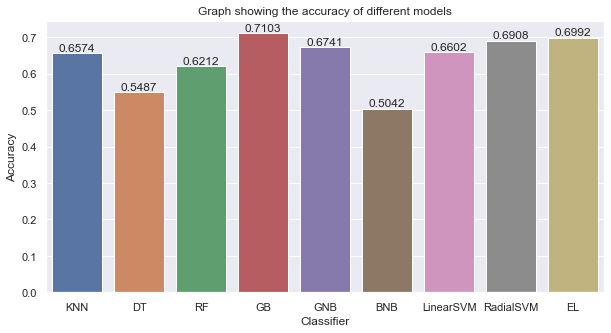

In [127]:

axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.title('Graph showing the accuracy of different models')    
plt.show()

***Gradient Boosting Classifier shows highest accuracy of 71.03%***

# Fine tuning of parameters

In [128]:
randfine=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine.fit(x_train,y_train)
y_randfine=randfine.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_randfine))
print("confusion matrix is",confusion_matrix(y_test,y_randfine))

accuracy is 0.6183844011142061
confusion matrix is [[36  1  8  0  7]
 [ 4 61 13 29  2]
 [ 7 19 27  5  7]
 [ 5 10  5 92  0]
 [ 7  3  5  0  6]]


In [129]:
gbfine=GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_features=4, max_depth=2, random_state=42)
gbfine.fit(x_train,y_train)
y_gbfine = gbfine.predict(x_test)
print(confusion_matrix(y_test, y_gbfine))
print('accuracy is',accuracy_score(y_test,y_gbfine))

[[51  0  0  0  1]
 [ 7 62 19 21  0]
 [ 8  5 49  0  3]
 [ 6  9  3 94  0]
 [10  0  9  0  2]]
accuracy is 0.7186629526462396


***Fine Tuning of parameters has improved the accuracy of the Gradient Boosting Classifier model from 71.03 to 71.86 %, which is the highest***

# Standardisation

In [130]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
x=standard.fit_transform(x)

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

# Logistic Regression

In [132]:
lr1 = LogisticRegression()
lr1.fit(x_train, y_train)
y_lr1 = lr1.predict(x_test)
acc=accuracy_score(y_test,y_lr1)
print("accuracy is",acc)

accuracy is 0.6880222841225627


# KNN

In [133]:
knn1=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn1.fit(x_train,y_train)
y_knn1=knn1.predict(x_test)
acc=accuracy_score(y_test,y_knn1)
print("accuracy is",acc)

accuracy is 0.6350974930362117


# Gradient Boosting¶

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
gb1=GradientBoostingClassifier()
gb1.fit(x_train,y_train)
y_gb1=gb1.predict(x_test)
acc=accuracy_score(y_test,y_gb1)
print("accuracy is",acc)

accuracy is 0.7103064066852368


# Random Forest¶

In [135]:
rf1=RandomForestClassifier(max_depth=100,n_estimators=100)
rf1.fit(x_train,y_train)
y_rf1=rf1.predict(x_test)
acc=accuracy_score(y_test,y_rf1)
print("accuracy is",acc)


accuracy is 0.6211699164345403


# GaussianNB¶

In [136]:
gnb1=GaussianNB()
gnb1.fit(x_train,y_train)
y_gnb1= gnb1.predict(x_test)
acc=accuracy_score(y_test,y_gnb1)
print('accuracy is',acc)

accuracy is 0.6740947075208914


# Bernoulli Naive Bayes

In [137]:
bnb1=BernoulliNB()
bnb1.fit(x_train,y_train)
y_bnb1=bnb1.predict(x_test)
acc=accuracy_score(y_test,y_bnb1)
print('accuracy is',acc)

accuracy is 0.6155988857938719


# Decision Tree

In [138]:
dt1=DecisionTreeClassifier(max_depth=100,random_state=42)
dt1.fit(x_train,y_train)
y_dt1=dt1.predict(x_test)
acc=accuracy_score(y_test,y_dt1)
print("accuracy is",acc)

accuracy is 0.5431754874651811


# Linear SVM

In [139]:
from sklearn.svm import LinearSVC
svm1=LinearSVC()
svm1.fit(x_train,y_train)
y_svm1=svm1.predict(x_test)
acc=accuracy_score(y_test,y_svm1)
print("accuracy is",acc)

accuracy is 0.6601671309192201


# Radial SVM

In [140]:
svc1=SVC(kernel='rbf',probability=True)
svc1.fit(x_train,y_train)
y_svc1 = svc1.predict(x_test)
acc=accuracy_score(y_test,y_svc1)
# Summary of the predictions made by the classifier

print('Accuracy is ',acc)

Accuracy is  0.6880222841225627


 #### Standardisation did not have any impact on the accuracies of models

# Fine Tuning of Parameters

In [141]:
gb1=GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_features=4, max_depth=2, random_state=42)
gb1.fit(x_train,y_train)
y_gb1 = gb1.predict(x_test)
print(confusion_matrix(y_test, y_gb1))
print('accuracy is',accuracy_score(y_test,y_gb1))

[[51  0  0  0  1]
 [ 7 62 19 21  0]
 [ 8  5 49  0  3]
 [ 6  9  3 94  0]
 [10  0  9  0  2]]
accuracy is 0.7186629526462396


# Normalization

In [142]:
nrm=Normalizer()
x1=nrm.fit_transform(x1)

In [143]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.1,random_state=42)

# LogisticRegression

In [144]:
lr2 = LogisticRegression()
lr2.fit(x1_train, y_train)
y_lr2 = lr2.predict(x1_test)
acc=accuracy_score(y_test,y_lr2)
print("accuracy is",acc)

accuracy is 0.6796657381615598


# KNN

In [145]:
knn2=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn2.fit(x1_train,y_train)
y_knn2=knn2.predict(x1_test)
acc=accuracy_score(y_test,y_knn2)
print("accuracy is",acc)

accuracy is 0.5988857938718662


# GradientBoosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
gb2=GradientBoostingClassifier()
gb2.fit(x1_train,y_train)
y_gb2=gb2.predict(x1_test)
print("accuracy is",accuracy_score(y_test,y_gb2))

accuracy is 0.6880222841225627


# RandomForestClassifier

In [147]:
rf2=RandomForestClassifier(max_depth=100,n_estimators=100)
rf2.fit(x1_train,y_train)
y_rf2=rf2.predict(x1_test)
print("accuracy is",accuracy_score(y_test,y_rf2))

accuracy is 0.6295264623955432


# GaussianNB

In [148]:
gnb2=GaussianNB()
gnb2.fit(x1_train,y_train)
y_gnb2= gnb2.predict(x1_test)

print('accuracy is',accuracy_score(y_test,y_gnb2))

accuracy is 0.5821727019498607


# BernoulliNB

In [149]:
from sklearn.naive_bayes import BernoulliNB
bnb2=BernoulliNB()
bnb2.fit(x1_train,y_train)
y_bnb2=bnb2.predict(x1_test)
print("accuracy is",accuracy_score(y_test,y_bnb2))


accuracy is 0.5041782729805014


# DecisionTree

In [150]:
dt2=DecisionTreeClassifier(max_depth=100,random_state=42)
dt2.fit(x1_train,y_train)
y_dt2=dt2.predict(x1_test)
acc=accuracy_score(y_test,y_dt2)
print("accuracy is",acc)

accuracy is 0.5097493036211699


# Linear SVM¶

In [151]:
from sklearn.svm import LinearSVC
svm2=LinearSVC()
svm2.fit(x1_train,y_train)
y_svm2=svm2.predict(x1_test)
acc=accuracy_score(y_test,y_svm2)
print("accuracy is",acc)

accuracy is 0.649025069637883


# Radial SVM

In [152]:
svc2=SVC(kernel='rbf',probability=True)
svc2=svc2.fit(x1_train,y_train)
y_svc2 = svc2.predict(x1_test)
acc=accuracy_score(y_test,y_svc2)
print('Accuracy is ',acc)


Accuracy is  0.6963788300835655


#### Normalization does not seem to have made any improvment in accurcy of the models.

# Fine Tuning of Parameters

In [153]:
gb2=GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_features=4, max_depth=2, random_state=42)
gb2.fit(x1_train,y_train)
y_gb2 = gb2.predict(x1_test)
print(confusion_matrix(y_test, y_gb2))
print('accuracy is',accuracy_score(y_test,y_gb2))

[[48  0  1  0  3]
 [ 9 65 12 23  0]
 [ 8 26 30  0  1]
 [ 6 12  1 93  0]
 [ 9  2  7  0  3]]
accuracy is 0.6657381615598886


# MinMax Scaling

In [154]:
minmax1=MinMaxScaler()
x2=minmax1.fit_transform(x2)
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.1,random_state=42)

# Logistic Regression

In [155]:
lr3 = LogisticRegression()
lr3.fit(x2_train, y_train)
y_lr3 = lr3.predict(x2_test)
acc=accuracy_score(y_test,y_lr3)
print("accuracy is",acc)

accuracy is 0.6824512534818942


# KNN

In [156]:
knn3=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn3.fit(x2_train,y_train)
y_knn3=knn3.predict(x2_test)
acc=accuracy_score(y_test,y_knn3)
print("accuracy is",acc)

accuracy is 0.6573816155988857


# GradientBoosting

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
gb3=GradientBoostingClassifier()
gb3.fit(x2_train,y_train)
y_gb3=gb3.predict(x2_test)
print("accuracy is",accuracy_score(y_test,y_gb3))

accuracy is 0.7103064066852368


# RandomForest

In [158]:
rf3=RandomForestClassifier(max_depth=100,n_estimators=100)
rf3.fit(x2_train,y_train)
y_rf3=rf3.predict(x2_test)
print("accuracy is",accuracy_score(y_test,y_rf3))

accuracy is 0.6128133704735376


# GaussianNB

In [159]:
gnb3=GaussianNB()
gnb3.fit(x2_train,y_train)
y_gnb3= gnb3.predict(x2_test)

print('accuracy is',accuracy_score(y_test,y_gnb3))


accuracy is 0.6740947075208914


# BernoulliNB

In [160]:
from sklearn.naive_bayes import BernoulliNB
bnb3=BernoulliNB()
bnb3.fit(x2_train,y_train)
y_bnb3=bnb3.predict(x2_test)
print("accuracy is",accuracy_score(y_test,y_bnb3))


accuracy is 0.6295264623955432


# DecisionTree

In [161]:
dt3=DecisionTreeClassifier(max_depth=100,random_state=42)
dt3.fit(x2_train,y_train)
y_dt3=dt3.predict(x2_test)
acc=accuracy_score(y_test,y_dt3)
print("accuracy is",acc)

accuracy is 0.5459610027855153


# Linear SVM

In [162]:

svm3=LinearSVC()
svm3.fit(x2_train,y_train)
y_svm3=svm3.predict(x2_test)
acc=accuracy_score(y_test,y_svm3)
print("accuracy is",acc)

accuracy is 0.6601671309192201


# Radial SVM

In [163]:
svc3=SVC(kernel='rbf',probability=True)
svc3=svc3.fit(x2_train,y_train)
y_svc3 = svc3.predict(x2_test)
acc=accuracy_score(y_test,y_svc3)
print('Accuracy is ',acc)


Accuracy is  0.7047353760445683


####  MinMax Scaling of data also does not improve the accuracy of  the models.

# Fine Tuning of Parameters

In [164]:
gb3=GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_features=4, max_depth=2, random_state=42)
gb3.fit(x2_train,y_train)
y_gb2 = gb2.predict(x2_test)
print(confusion_matrix(y_test, y_gb3))
print('accuracy is',accuracy_score(y_test,y_gb3))

[[48  0  1  0  3]
 [ 7 67 12 22  1]
 [ 8  9 42  0  6]
 [ 4  9  5 94  0]
 [ 9  1  7  0  4]]
accuracy is 0.7103064066852368


# Feature Importance 

In [165]:
pd.Series(randfine.feature_importances_,index=['Age', 'Condition', 'EaseofUse', 'Satisfaction', 'Sex',
       'UsefulCount','Review_Sentiment']).sort_values(ascending=False)*100


Satisfaction        29.961646
UsefulCount         24.592703
Age                 14.354613
Condition           12.886779
Review_Sentiment     9.290630
EaseofUse            6.346906
Sex                  2.566723
dtype: float64

**<div class="alert alert-block alert-info"> We have got Accuracy for Gradient Boosting as 71.03%. Let us  now check the accuracy of all models without doing any scaling and without removing the outliers of 'Ease of Use' and 'Useful count' columns </div>** 

# Logistic Regression

In [166]:
lr4 = LogisticRegression()
lr4.fit(xcopy_train, ycopy_train)
ycopy_lr4 = lr4.predict(xcopy_test)
acc=accuracy_score(ycopy_test,ycopy_lr4)
print("accuracy is",acc)


accuracy is 0.6454545454545455


# KNN

In [167]:
knn4=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn4.fit(xcopy_train,ycopy_train)
ycopy_knn4=knn4.predict(xcopy_test)
acc=accuracy_score(ycopy_test,ycopy_knn4)
print("accuracy is",acc)

accuracy is 0.5931818181818181


# GradientBoosting

In [168]:
gb4=GradientBoostingClassifier()
gb4.fit(xcopy_train,ycopy_train)
ycopy_gb4=gb4.predict(xcopy_test)
print("accuracy is",accuracy_score(ycopy_test,ycopy_gb4))


accuracy is 0.6681818181818182


# RandomForest

In [169]:
rf4=RandomForestClassifier(max_depth=100,n_estimators=100)
rf4.fit(xcopy_train,ycopy_train)
ycopy_rf4=rf4.predict(xcopy_test)
print("accuracy is",accuracy_score(ycopy_test,ycopy_rf4))

accuracy is 0.6


# GaussianNB

In [170]:
gnb4=GaussianNB()
gnb4.fit(xcopy_train,ycopy_train)

ycopy_gnb4= gnb4.predict(xcopy_test)
print('accuracy is',accuracy_score(ycopy_test,ycopy_gnb4))


accuracy is 0.6704545454545454


# BernoulliNB¶

In [171]:
bnb4=BernoulliNB()
bnb4.fit(xcopy_train,ycopy_train)
ycopy_bnb4=bnb4.predict(xcopy_test)
acc=accuracy_score(ycopy_test,ycopy_bnb4)
print("accuracy is",acc)

accuracy is 0.45681818181818185


# Decision Tree 

In [172]:
dt4=DecisionTreeClassifier(max_depth=100,random_state=42)
dt4.fit(xcopy_train,ycopy_train)
ycopy_dt4=dt4.predict(xcopy_test)
acc=accuracy_score(ycopy_test,ycopy_dt4)
print("accuracy is",acc)

accuracy is 0.5545454545454546


# Linear SVM

In [173]:
from sklearn.svm import LinearSVC
svm4=LinearSVC()
svm4.fit(xcopy_train,ycopy_train)
ycopy_svm4=svm4.predict(xcopy_test)
acc=accuracy_score(ycopy_test,ycopy_svm4)
print("accuracy is",acc)

accuracy is 0.6295454545454545


# Radial SVM

In [174]:
svc4=SVC(kernel='rbf',probability=True)
svc4=svc4.fit(xcopy_train,ycopy_train)
ycopy_svc4 = svc4.predict(xcopy_test)
acc=accuracy_score(ycopy_test,ycopy_svc4)
print('Accuracy is ',acc)


Accuracy is  0.6568181818181819


****<i>The accuracy of the models did not show any improvement after modeling without removing outliers and without doing any scaling </i>****           

# Fine Tuning of Parameters

In [175]:

gb4=GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_features=4, max_depth=2, random_state=42)
gb4.fit(xcopy_train,ycopy_train)
ycopy_gb4=gb4.predict(xcopy_test)
print("accuracy is",accuracy_score(ycopy_test,ycopy_gb4))
print(confusion_matrix(ycopy_test, ycopy_gb4))


accuracy is 0.6659090909090909
[[96  0  3  0  0]
 [ 3 49 27 22  3]
 [14 12 49  0  3]
 [ 6 14  6 98  1]
 [22  1  9  1  1]]


# ***Since the Gradient Boosting Classifier without scaling shows highest accuracy compared to all other models, let us evaluate that model***

# Evaluating the Model

# Cross Validation using KFold 

In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=gbfine
kfold_validation= KFold(10)
results=cross_val_score(model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.64345404 0.66573816 0.63788301 0.66573816 0.68802228 0.65921788
 0.62290503 0.65642458 0.68994413 0.6396648 ]
0.6568992079177106


***Inference:The model have high accuracy on test data, but lower with cross-validation.If the accuracy from the cross-validation method is less than the accuracy from the holdout method, it indicates model is overfitting. Since the dataset is imbalanced, let us do the cross validation using StratifiedKfold Cross validation*** 

# StratifiedKFold Cross Validation

In [177]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=gbfine
scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(scores))

0.6532775453277546


In [178]:
y_test.value_counts()

no side effects                112
mild side effects              109
moderate side effects           65
extreme severe side effects     52
severe side effects             21
Name: Effectiveness, dtype: int64

In [179]:
y_gbfine

array(['no side effects', 'moderate side effects',
       'moderate side effects', 'extreme severe side effects',
       'extreme severe side effects', 'moderate side effects',
       'mild side effects', 'moderate side effects', 'no side effects',
       'extreme severe side effects', 'extreme severe side effects',
       'no side effects', 'extreme severe side effects',
       'mild side effects', 'extreme severe side effects',
       'mild side effects', 'extreme severe side effects',
       'moderate side effects', 'extreme severe side effects',
       'moderate side effects', 'moderate side effects',
       'no side effects', 'extreme severe side effects',
       'no side effects', 'moderate side effects',
       'extreme severe side effects', 'mild side effects',
       'extreme severe side effects', 'no side effects',
       'extreme severe side effects', 'no side effects',
       'mild side effects', 'extreme severe side effects',
       'no side effects', 'moderate side effect

In [180]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_gbfine})
df.head()

,Actual,Predicted
3163,no side effects,no side effects
3133,moderate side effects,moderate side effects
937,mild side effects,moderate side effects
196,extreme severe side effects,extreme severe side effects
2852,moderate side effects,extreme severe side effects


In [181]:
clf=pd.crosstab(df["Actual"],df["Predicted"])
clf

Predicted,extreme severe side effects,mild side effects,moderate side effects,no side effects,severe side effects
Actual,,,,,
extreme severe side effects,51,0,0,0,1
mild side effects,7,62,19,21,0
moderate side effects,8,5,49,0,3
no side effects,6,9,3,94,0
severe side effects,10,0,9,0,2


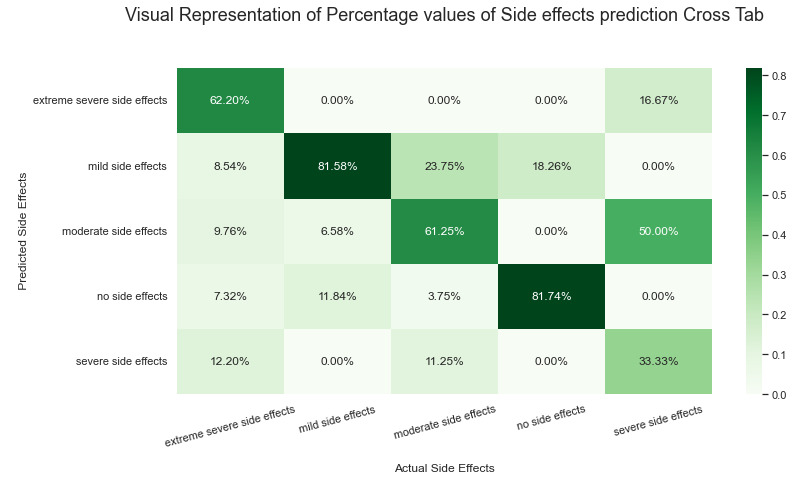

In [182]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = ax = sns.heatmap(clf/np.sum(clf), annot=True, 
            fmt='.2%', cmap='Greens')

ax.set_title('Visual Representation of Percentage values of Side effects prediction Cross Tab\n\n', fontsize = 18);
ax.set_xlabel('\nActual Side Effects')
ax.set_ylabel('\n Predicted Side Effects');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['extreme severe side effects','mild side effects','moderate side effects','no side effects','severe side effects'])
ax.yaxis.set_ticklabels(['extreme severe side effects','mild side effects','moderate side effects','no side effects','severe side effects'])

## Display the visualization of the Confusion Matrix.
plt.xticks(rotation=15)
plt.show()

# Visualization of cross tab using bar plot

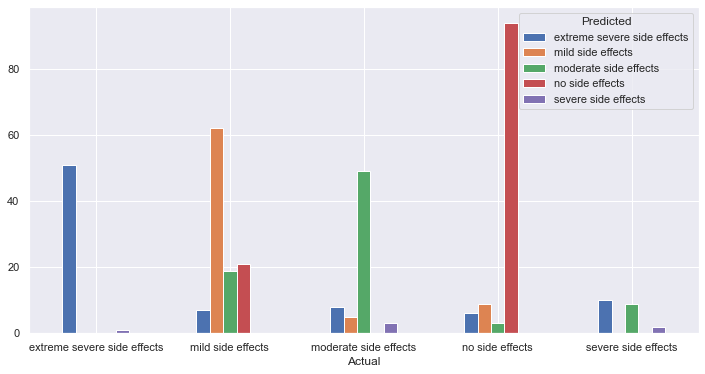

In [183]:
barplot = clf.plot.bar(rot=0)

# Visualization of cross tab using stacked bar plot

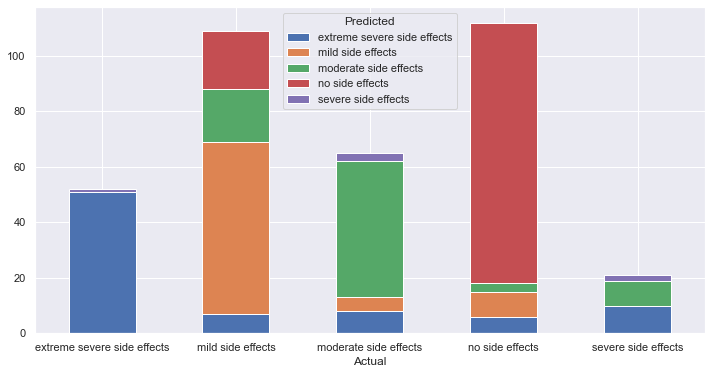

In [184]:
pl = clf.plot(kind="bar", stacked=True, rot=0)

## CONCLUSION

<span style="color:blue"> 1)***The Side effect of the drug is best modelled by  Gradient Boosting with an accuracy of 71.86 % & 65.33% after StratifiedKFold cross validation. .*** </span>  
2)People in the age group 45-54 are thos who mostly used this drug and within that the female ratio is higher.  
3)People with the condition 'Major Depressive Disorder' consumed this drug more.  
4) Most common conditions reported among patients who use the drug 'cymbalta' are Pain, High Blood Pressure, Depression, Neuropathic pain, Neuropathic Pain etc  
5)On comparison of the sex also,the female ratio is higher.
